<a href="https://colab.research.google.com/github/Kiogora/OpenHAPv2/blob/main/software/measurementNormalization/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Update libraries 

In [1]:
!pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (5.1.0)


# Import required libraries

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import numpy as np;
import plotly.express as px;
import pandas as pd;
import matplotlib.pyplot as plt;
import statsmodels.api as sm;

# Define data fields as used in data capture

In [3]:
command_sent_time_txt = "Command sent time(UTC)"
measurement_received_time_txt = "Measurement received time (UTC)"
device_field_txt = "Device"
device_time_field_txt = "Device time (UTC)"
measurement_field_txt = "Particulate measurement"
connected_openhap_units_field_txt = "Connected OpenHAP units"

# Read the input data capture file

In [4]:
base_url= "https://github.com/Kiogora/OpenHAPv2/raw/main/software/measurementNormalization/data"

target_100ug_df=pd.read_csv(f'{base_url}/target_100ug.csv')
target_500ug_df=pd.read_csv(f'{base_url}/target_500ug.csv')
target_800ug_df=pd.read_csv(f'{base_url}/target_800ug.csv')

# Display settings

Limit columns displayed for PDF conversion or static viewers.

In [5]:
pd.set_option('display.max_columns', 10)

# Show sample data from various measurement phases

In [6]:
target_100ug_df.head()

Command sent time(UTC) Measurement received time (UTC)             Device  \
0    2021-06-24 12:36:47             2021-06-24 12:36:52  40:f5:20:5b:21:d0   
1    2021-06-24 12:36:47             2021-06-24 12:36:52  40:f5:20:5b:21:c8   
2    2021-06-24 12:36:47             2021-06-24 12:36:52  40:f5:20:5b:20:dc   
3    2021-06-24 12:36:47             2021-06-24 12:36:52  40:f5:20:5b:21:74   
4    2021-06-24 12:36:47             2021-06-24 12:36:52  40:f5:20:5b:20:e4   

     Device time (UTC)  Particulate measurement  Connected OpenHAP units  
0  2021-06-24 12:36:46                     5.15                       19  
1  2021-06-24 12:36:46                     5.30                       19  
2  2021-06-24 12:36:46                     5.60                       19  
3  2021-06-24 12:36:46                     5.50                       19  
4  2021-06-24 12:36:47                     5.95                       19

In [7]:
target_500ug_df.head()

Command sent time(UTC) Measurement received time (UTC)             Device  \
0    2021-06-24 14:15:05             2021-06-24 14:15:09  40:f5:20:5b:20:c0   
1    2021-06-24 14:15:05             2021-06-24 14:15:09  40:f5:20:5b:20:ec   
2    2021-06-24 14:15:05             2021-06-24 14:15:09  40:f5:20:5b:21:94   
3    2021-06-24 14:15:05             2021-06-24 14:15:09  40:f5:20:5b:21:8c   
4    2021-06-24 14:15:05             2021-06-24 14:15:09  40:f5:20:5b:21:d8   

     Device time (UTC)  Particulate measurement  Connected OpenHAP units  
0  2021-06-24 14:15:04                     6.55                       21  
1  2021-06-24 14:15:04                     8.05                       21  
2  2021-06-24 14:15:04                     7.85                       21  
3  2021-06-24 14:15:04                     5.95                       21  
4  2021-06-24 14:15:04                     6.20                       21

In [8]:
target_800ug_df.head()

Command sent time(UTC) Measurement received time (UTC)             Device  \
0    2021-06-24 15:14:14             2021-06-24 15:14:18  40:f5:20:5b:21:c8   
1    2021-06-24 15:14:14             2021-06-24 15:14:18  40:f5:20:5b:20:d8   
2    2021-06-24 15:14:14             2021-06-24 15:14:18  40:f5:20:5b:20:e0   
3    2021-06-24 15:14:14             2021-06-24 15:14:18  40:f5:20:5b:20:dc   
4    2021-06-24 15:14:14             2021-06-24 15:14:18  40:f5:20:5b:20:ec   

     Device time (UTC)  Particulate measurement  Connected OpenHAP units  
0  2021-06-24 15:14:13                     8.20                       21  
1  2021-06-24 15:14:13                     7.25                       21  
2  2021-06-24 15:14:12                     7.45                       21  
3  2021-06-24 15:14:13                     8.30                       21  
4  2021-06-24 15:14:13                     9.05                       21

# Define data types

In [9]:
target_100ug_df[command_sent_time_txt] = pd.to_datetime(target_100ug_df[command_sent_time_txt])
target_100ug_df[measurement_received_time_txt] = pd.to_datetime(target_100ug_df[measurement_received_time_txt])
target_100ug_df[device_time_field_txt] = pd.to_datetime(target_100ug_df[device_time_field_txt])
target_100ug_df[measurement_field_txt]= target_100ug_df[measurement_field_txt].astype(float)

In [10]:
target_500ug_df[command_sent_time_txt] = pd.to_datetime(target_500ug_df[command_sent_time_txt])
target_500ug_df[measurement_received_time_txt] = pd.to_datetime(target_500ug_df[measurement_received_time_txt])
target_500ug_df[device_time_field_txt] = pd.to_datetime(target_500ug_df[device_time_field_txt])
target_500ug_df[measurement_field_txt]= target_500ug_df[measurement_field_txt].astype(float)

In [11]:
target_800ug_df[command_sent_time_txt] = pd.to_datetime(target_800ug_df[command_sent_time_txt])
target_800ug_df[measurement_received_time_txt] = pd.to_datetime(target_800ug_df[measurement_received_time_txt])
target_800ug_df[device_time_field_txt] = pd.to_datetime(target_800ug_df[device_time_field_txt])
target_800ug_df[measurement_field_txt]= target_800ug_df[measurement_field_txt].astype(float)

# Pivot the data

In [12]:
target_100ug_df=target_100ug_df.pivot_table(index=command_sent_time_txt, columns=device_field_txt, values=measurement_field_txt)

In [13]:
target_500ug_df=target_500ug_df.pivot_table(index=command_sent_time_txt, columns=device_field_txt, values=measurement_field_txt)

In [14]:
target_800ug_df=target_800ug_df.pivot_table(index=command_sent_time_txt, columns=device_field_txt, values=measurement_field_txt)

In [15]:
target_100ug_df.head()

Device                  40:f5:20:5b:20:bc  40:f5:20:5b:20:c0  \
Command sent time(UTC)                                         
2021-06-24 12:36:47                  5.65               5.15   
2021-06-24 12:36:55                  5.80               5.05   
2021-06-24 12:37:04                  5.65               5.35   
2021-06-24 12:37:12                  5.50               5.70   
2021-06-24 12:37:20                  5.50               5.70   

Device                  40:f5:20:5b:20:c4  40:f5:20:5b:20:d8  \
Command sent time(UTC)                                         
2021-06-24 12:36:47                  5.60               5.20   
2021-06-24 12:36:55                  5.45               5.50   
2021-06-24 12:37:04                  5.45               5.45   
2021-06-24 12:37:12                  5.45               5.40   
2021-06-24 12:37:20                  5.50               5.20   

Device                  40:f5:20:5b:20:dc  ...  40:f5:20:5b:21:a4  \
Command sent time(UTC)                     ...                      
2021-06-24 12:36:47                  5.60  ...                NaN   
2021-06-24 12:36:55                  5.75  ...                NaN   
2021-06-24 12:37:04                  5.75  ...               4.95   
2021-06-24 12:37:12                  5.70  ...               4.85   
2021-06-24 12:37:20                  5.75  ...               4.80   

Device                  40:f5:20:5b:21:c8  40:f5:20:5b:21:cc  \
Command sent time(UTC)                                         
2021-06-24 12:36:47                  5.30               5.95   
2021-06-24 12:36:55                  5.40               6.15   
2021-06-24 12:37:04                  5.25               6.25   
2021-06-24 12:37:12                  5.25               5.95   
2021-06-24 12:37:20                  5.10               6.10   

Device                  40:f5:20:5b:21:d0  40:f5:20:5b:21:d8  
Command sent time(UTC)                                        
2021-06-24 12:36:47                  5.15               4.80  
2021-06-24 12:36:55                  5.25               4.75  
2021-06-24 12:37:04                  4.95               4.90  
2021-06-24 12:37:12                  4.85               4.85  
2021-06-24 12:37:20                  4.70               4.95  

[5 rows x 20 columns]

In [16]:
target_500ug_df.head()

Device                  40:f5:20:5b:20:bc  40:f5:20:5b:20:c0  \
Command sent time(UTC)                                         
2021-06-24 14:15:05                  6.95               6.55   
2021-06-24 14:15:13                  7.25               6.15   
2021-06-24 14:15:21                  7.30               6.20   
2021-06-24 14:15:30                  7.00               6.25   
2021-06-24 14:15:38                  7.20               6.45   

Device                  40:f5:20:5b:20:c4  40:f5:20:5b:20:d8  \
Command sent time(UTC)                                         
2021-06-24 14:15:05                  6.35               6.30   
2021-06-24 14:15:13                  6.65               6.10   
2021-06-24 14:15:21                  6.75               6.20   
2021-06-24 14:15:30                  6.55               6.25   
2021-06-24 14:15:38                  6.50               6.35   

Device                  40:f5:20:5b:20:dc  ...  40:f5:20:5b:21:a4  \
Command sent time(UTC)                     ...                      
2021-06-24 14:15:05                  7.30  ...               6.05   
2021-06-24 14:15:13                  7.40  ...               5.90   
2021-06-24 14:15:21                  7.60  ...               5.75   
2021-06-24 14:15:30                  7.35  ...               5.85   
2021-06-24 14:15:38                  7.20  ...               6.10   

Device                  40:f5:20:5b:21:c8  40:f5:20:5b:21:cc  \
Command sent time(UTC)                                         
2021-06-24 14:15:05                  6.55               6.60   
2021-06-24 14:15:13                  6.80               6.75   
2021-06-24 14:15:21                  6.85               6.95   
2021-06-24 14:15:30                  6.85               6.75   
2021-06-24 14:15:38                   NaN               6.55   

Device                  40:f5:20:5b:21:d0  40:f5:20:5b:21:d8  
Command sent time(UTC)                                        
2021-06-24 14:15:05                  6.05               6.20  
2021-06-24 14:15:13                  6.25               6.15  
2021-06-24 14:15:21                  6.10               6.15  
2021-06-24 14:15:30                  6.30               6.20  
2021-06-24 14:15:38                  6.25               6.20  

[5 rows x 20 columns]

In [17]:
target_800ug_df.head()

Device                  40:f5:20:5b:20:bc  40:f5:20:5b:20:c0  \
Command sent time(UTC)                                         
2021-06-24 15:14:14                  8.40               8.40   
2021-06-24 15:14:22                  8.40               8.00   
2021-06-24 15:14:30                  8.30               7.80   
2021-06-24 15:14:38                  8.35               7.65   
2021-06-24 15:14:47                  8.40               7.85   

Device                  40:f5:20:5b:20:c4  40:f5:20:5b:20:d8  \
Command sent time(UTC)                                         
2021-06-24 15:14:14                  8.25               7.25   
2021-06-24 15:14:22                  8.05               7.25   
2021-06-24 15:14:30                  8.05               7.40   
2021-06-24 15:14:38                  8.10               7.25   
2021-06-24 15:14:47                  7.85               7.05   

Device                  40:f5:20:5b:20:dc  ...  40:f5:20:5b:21:a4  \
Command sent time(UTC)                     ...                      
2021-06-24 15:14:14                  8.30  ...               7.25   
2021-06-24 15:14:22                  8.50  ...               7.30   
2021-06-24 15:14:30                  8.55  ...               7.20   
2021-06-24 15:14:38                  8.30  ...               7.10   
2021-06-24 15:14:47                  8.45  ...               6.90   

Device                  40:f5:20:5b:21:c8  40:f5:20:5b:21:cc  \
Command sent time(UTC)                                         
2021-06-24 15:14:14                  8.20                8.0   
2021-06-24 15:14:22                  8.50                8.0   
2021-06-24 15:14:30                  8.30                7.9   
2021-06-24 15:14:38                  8.30                7.9   
2021-06-24 15:14:47                  7.95                7.8   

Device                  40:f5:20:5b:21:d0  40:f5:20:5b:21:d8  
Command sent time(UTC)                                        
2021-06-24 15:14:14                  7.65               7.50  
2021-06-24 15:14:22                  7.20               7.60  
2021-06-24 15:14:30                  6.90               7.70  
2021-06-24 15:14:38                  6.65               7.65  
2021-06-24 15:14:47                  7.05               7.65  

[5 rows x 20 columns]

# Plot the each experiment phase data

Plot 100 μg/m<sup>3</sup> target experiment data

Interactive plot:

In [18]:
#px.line(target_100ug_df)

Static plot:

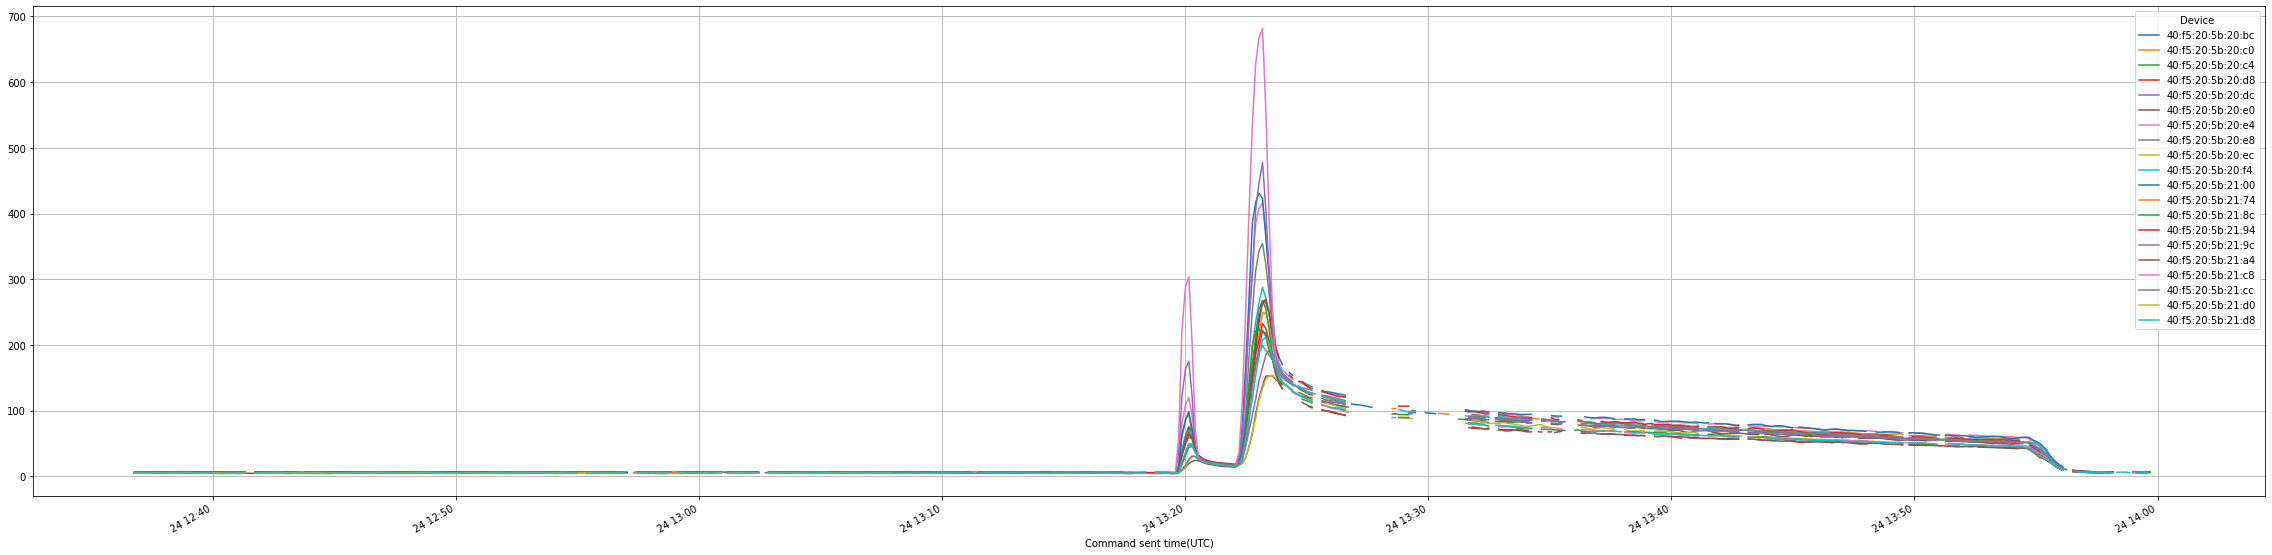

In [19]:
target_100ug_df.plot.line(figsize=(40,10), grid=True);

Plot 500 μg/m<sup>3</sup> target experiment phase data

Interactive plot:

In [20]:
#px.line(target_500ug_df)

Static plot:

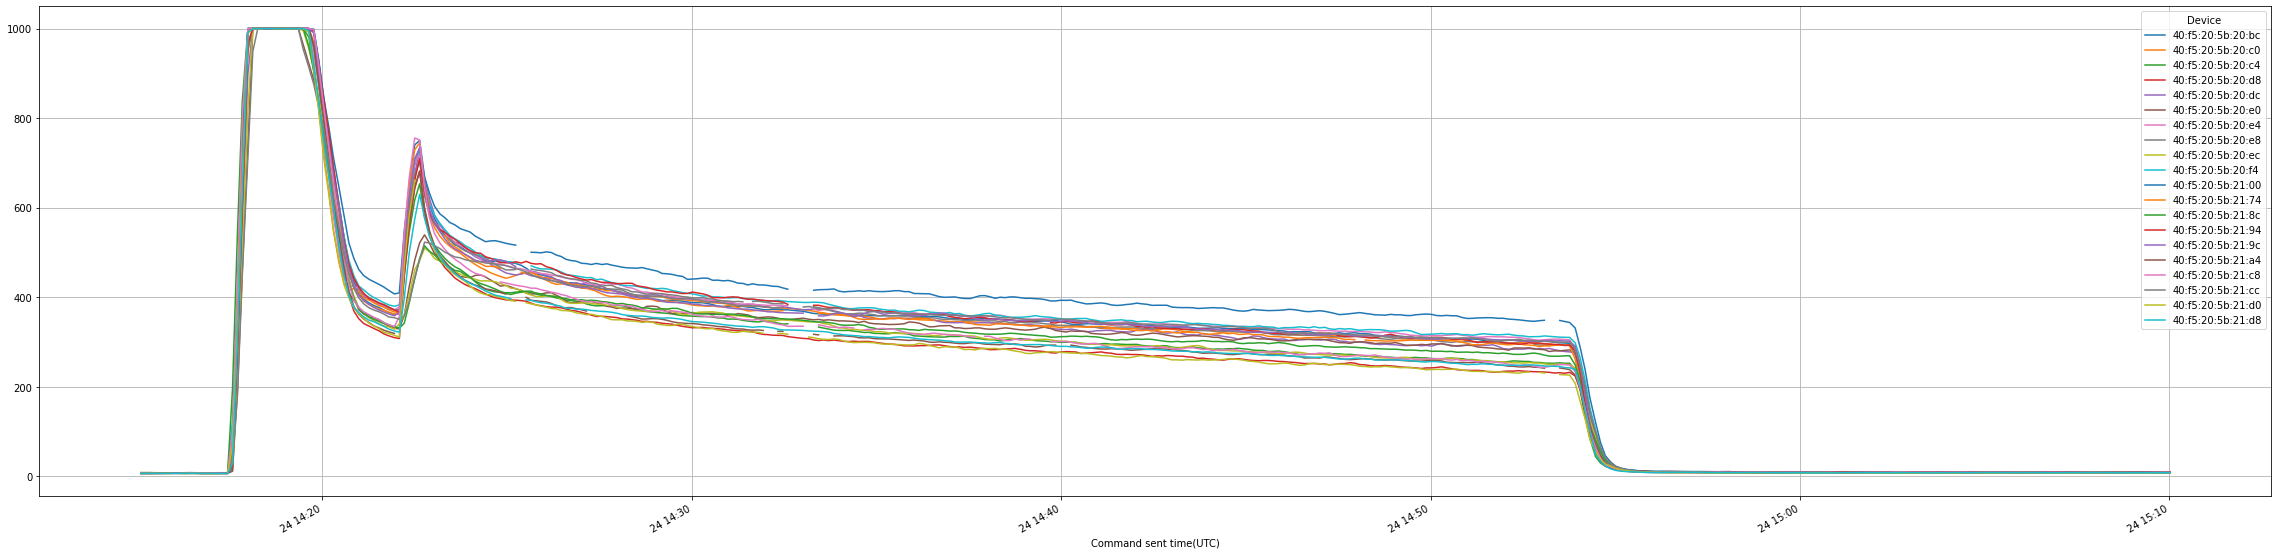

In [21]:
target_500ug_df.plot.line(figsize=(40,10), grid=True);

Plot 800 μg/m<sup>3</sup> target experiment phase data

Interactive plot:

In [22]:
#px.line(target_800ug_df)

Static plot:

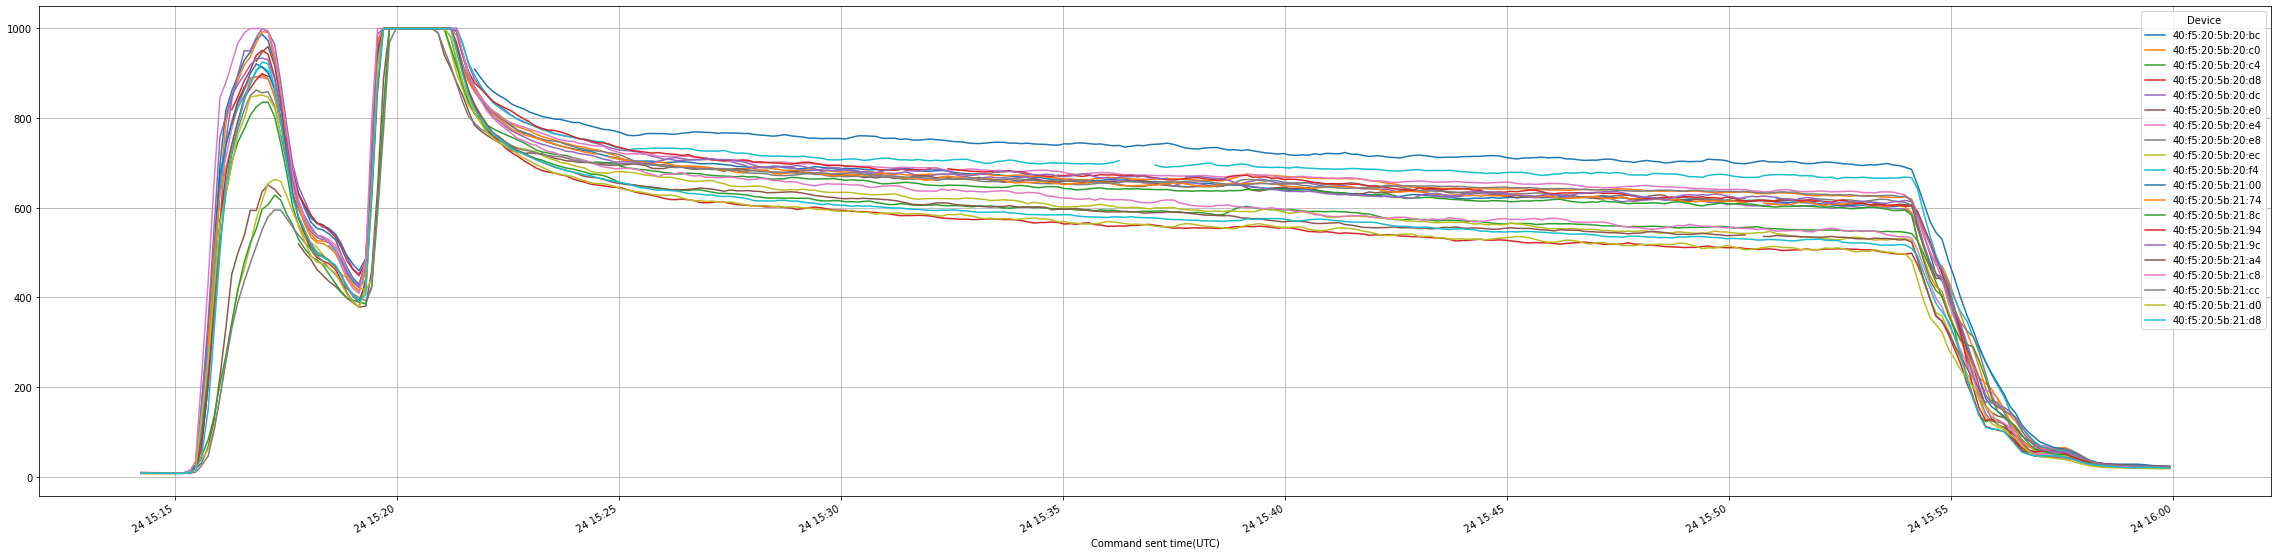

In [23]:
target_800ug_df.plot.line(figsize=(40,10), grid=True);

# Extract the data during the stable phases of each experiment


## Extract baseline data

We extract 20 minutes of data between 12:30 to 12:49 UTC for baseline data and linearly interpolate for missed datapoints.

In [24]:
start = "2021-06-24 12:40"
end = "2021-06-24 12:59"
df = target_100ug_df

masked_baseline_df = df.loc[start:end].interpolate()

Interactive plot:

In [25]:
#px.line(masked_baseline_df)

Static plot:

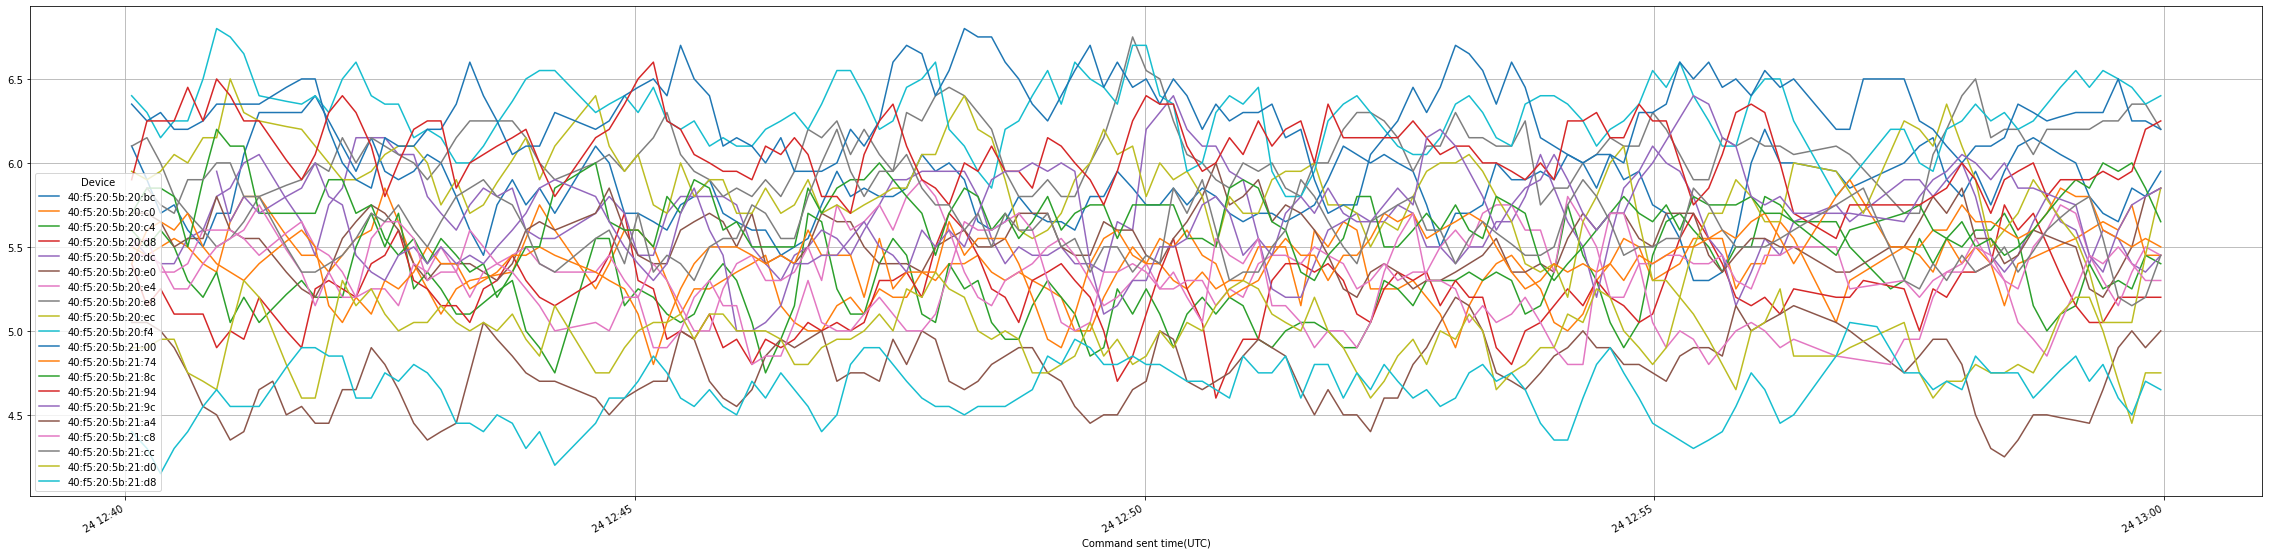

In [26]:
masked_baseline_df.plot.line(figsize=(40,10), grid=True);

Inspect number of datapoints as the number per experiment phase is directly proportional to the relative weight of contribution into the subsequent regression procedure

In [27]:
print(f"{masked_baseline_df.shape[0]} timepoints extracted")

141 timepoints extracted


## Extract 100 μg/m<sup>3</sup> target data

We extract 20 minutes of data between 13:32 to 13:51 UTC for the 100 μg/m<sup>3</sup> target experiment phase data and linearly interpolate for missed datapoints.

In [28]:
start = "2021-06-24 13:32"
end = "2021-06-24 13:51"
df = target_100ug_df

masked_target_100ug_df = df.loc[start:end].interpolate()

Interactive plot:

In [29]:
#px.line(masked_target_100ug_df)

Static plot:

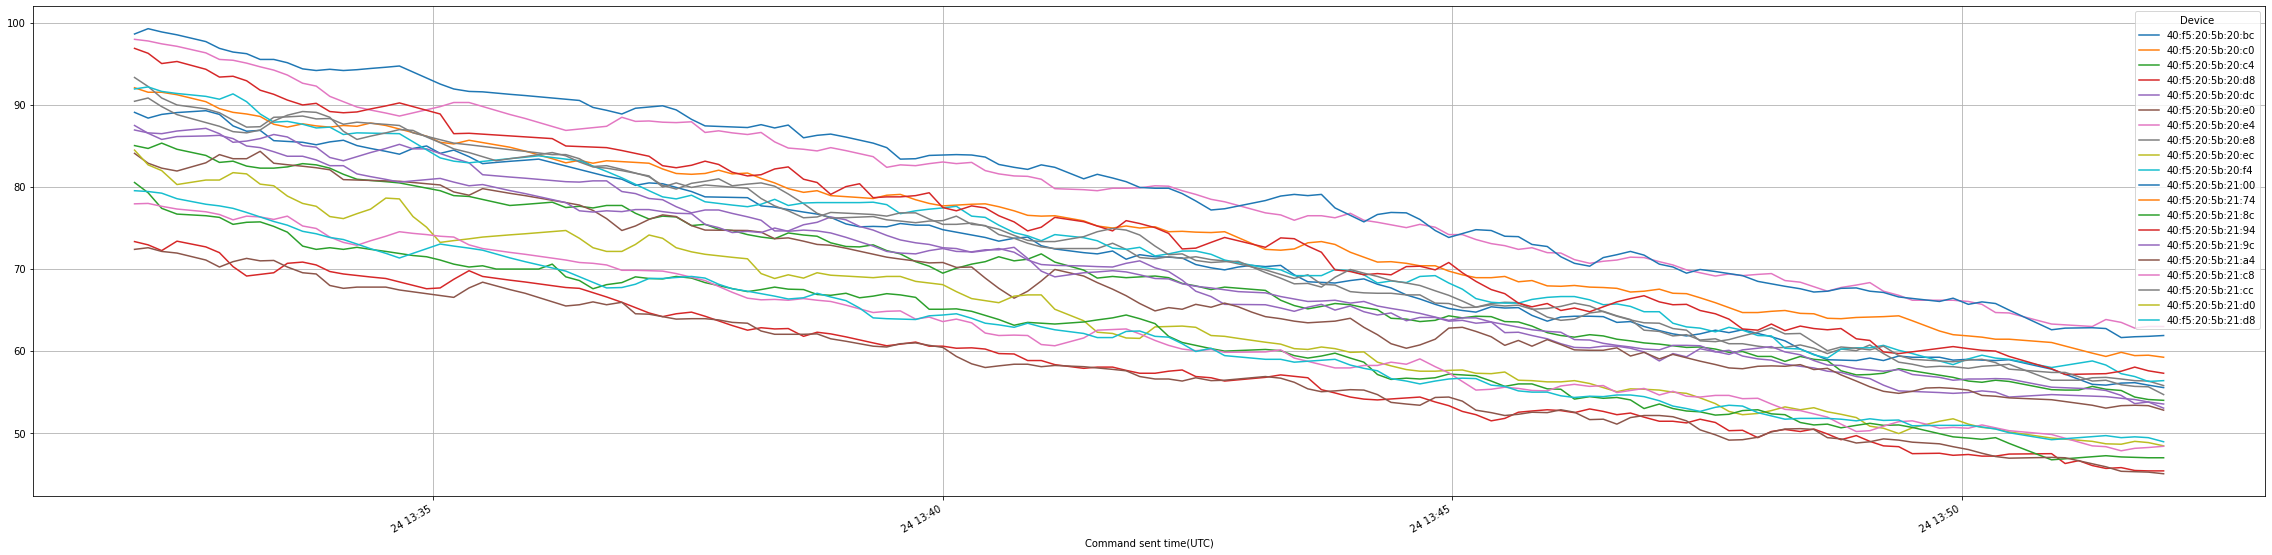

In [30]:
masked_target_100ug_df.plot.line(figsize=(40,10), grid=True);

Inspect number of datapoints as the number per experiment phase is directly proportional to the relative weight of contribution into the subsequent regression procedure

In [31]:
print(f"{masked_target_100ug_df.shape[0]} timepoints extracted")

142 timepoints extracted


## Extract 500 μg/m3 target data

We extract 20 minutes of data between 14:30 to 14:49 UTC for the 500 μg/m<sup>3</sup> target experiment phase data and linearly interpolate for missed datapoints.

In [32]:
start = "2021-06-24 14:30"
end = "2021-06-24 14:49"
df = target_500ug_df

masked_target_500ug_df = df.loc[start:end].interpolate()

Interactive plot:

In [33]:
#px.line(masked_target_500ug_df)

Static plot:

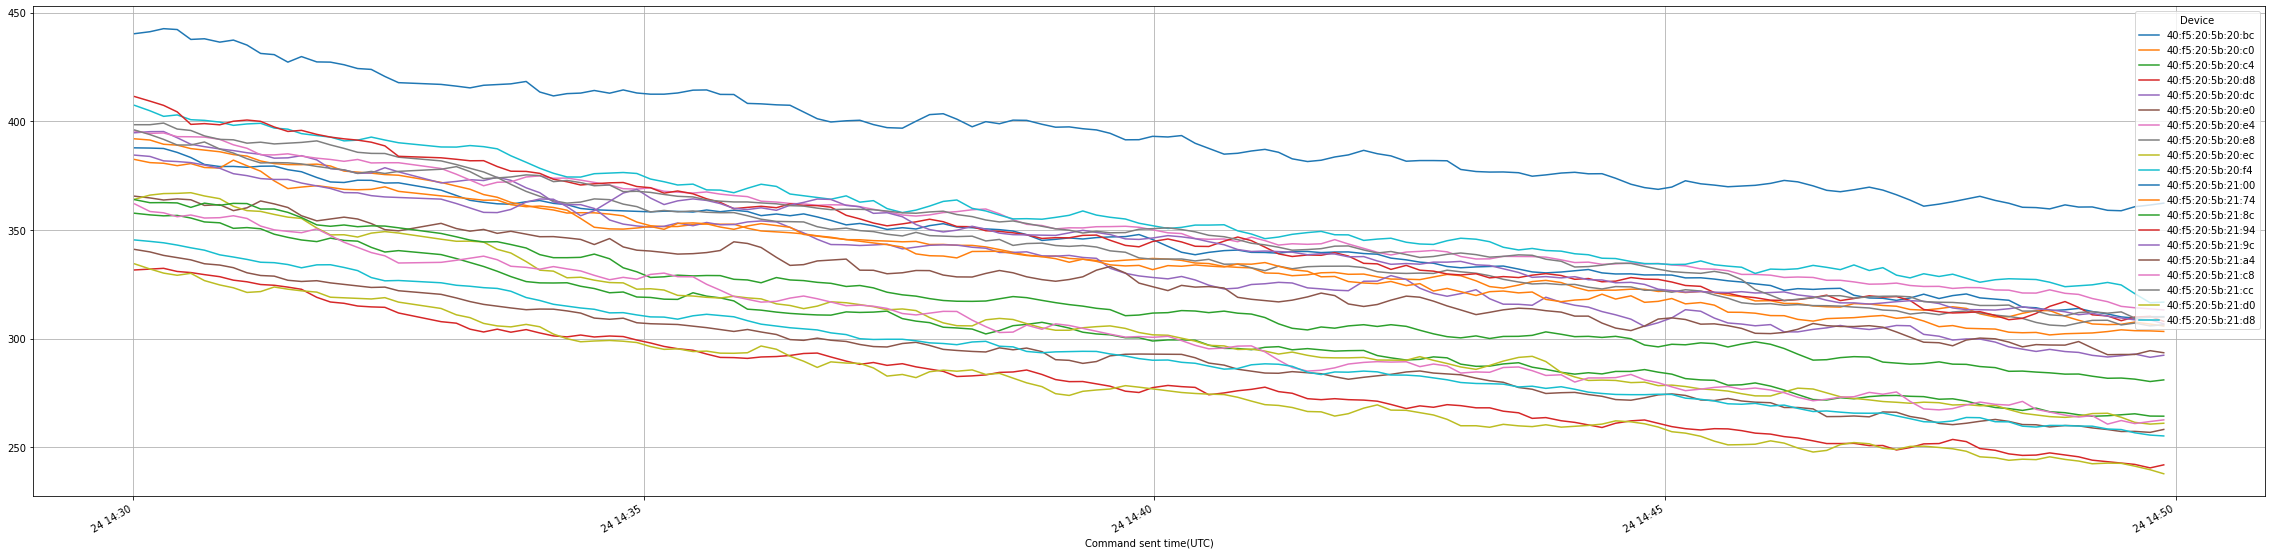

In [34]:
masked_target_500ug_df.plot.line(figsize=(40,10), grid=True);

Inspect number of datapoints as the number per experiment phase is directly proportional to the relative weight of contribution into the subsequent regression procedure

In [35]:
print(f"{masked_target_500ug_df.shape[0]} timepoints extracted")

144 timepoints extracted


## Extract 800 μg/m3 target data

We extract 20 minutes of data between 15:30 to 15:49 UTC for the 800 μg/m<sup>3</sup> target experiment phase data and linearly interpolate for missed datapoints.

In [36]:
start = "2021-06-24 15:30"
end = "2021-06-24 15:49"
df = target_800ug_df

masked_target_800ug_df = df.loc[start:end].interpolate()

Interactive plot:

In [37]:
#px.line(masked_target_800ug_df)

Static plot:

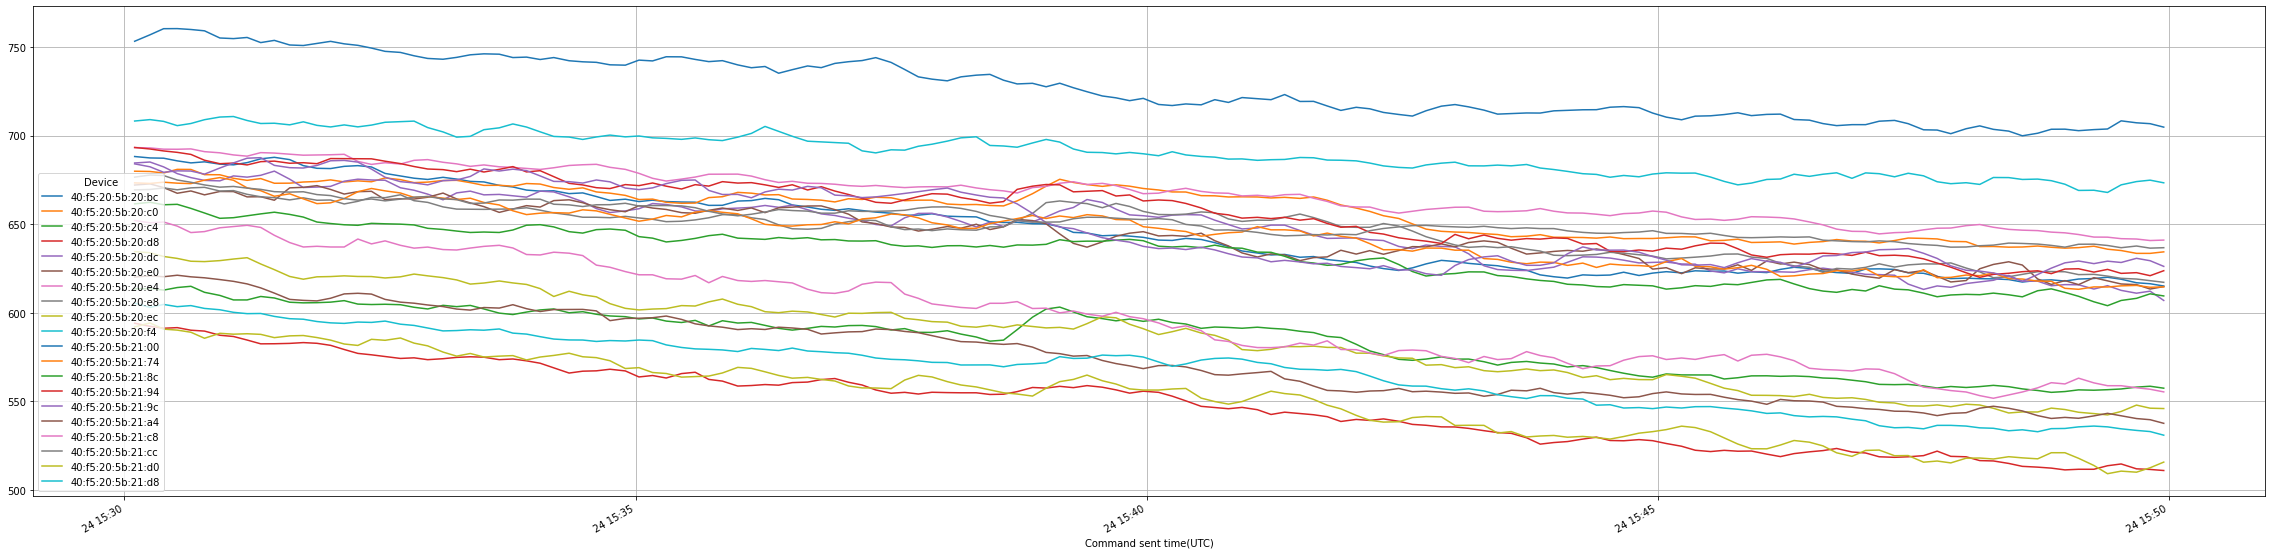

In [38]:
masked_target_800ug_df.plot.line(figsize=(40,10), grid=True);

Inspect number of datapoints as the number per experiment phase is directly proportional to the relative weight of contribution into the subsequent regression procedure

In [39]:
print(f"{masked_target_800ug_df.shape[0]} timepoints extracted")

145 timepoints extracted


## Concatenate all stable phase datasets 

We perform this in order to process the data over the entire baseline to 800 μg/m<sup>3</sup> measurement range supported by the SDS011 sensor

In [40]:
concat_df = pd.concat([masked_baseline_df, masked_target_100ug_df, masked_target_500ug_df, masked_target_800ug_df])

In [41]:
concat_df.head()

Device                  40:f5:20:5b:20:bc  40:f5:20:5b:20:c0  \
Command sent time(UTC)                                         
2021-06-24 12:40:04                  6.10               5.50   
2021-06-24 12:40:13                  5.90               5.45   
2021-06-24 12:40:21                  5.70               5.50   
2021-06-24 12:40:29                  5.75               5.55   
2021-06-24 12:40:37                  5.60               5.50   

Device                  40:f5:20:5b:20:c4  40:f5:20:5b:20:d8  \
Command sent time(UTC)                                         
2021-06-24 12:40:04                   5.6               5.40   
2021-06-24 12:40:13                   5.5               5.15   
2021-06-24 12:40:21                   5.6               5.25   
2021-06-24 12:40:29                   5.5               5.10   
2021-06-24 12:40:37                   5.3               5.10   

Device                  40:f5:20:5b:20:dc  ...  40:f5:20:5b:21:a4  \
Command sent time(UTC)                     ...                      
2021-06-24 12:40:04                  5.55  ...               5.05   
2021-06-24 12:40:13                  5.45  ...               5.05   
2021-06-24 12:40:21                  5.40  ...               5.00   
2021-06-24 12:40:29                  5.40  ...               4.90   
2021-06-24 12:40:37                  5.55  ...               4.75   

Device                  40:f5:20:5b:21:c8  40:f5:20:5b:21:cc  \
Command sent time(UTC)                                         
2021-06-24 12:40:04                  5.45                NaN   
2021-06-24 12:40:13                  5.45               5.85   
2021-06-24 12:40:21                  5.40               5.75   
2021-06-24 12:40:29                  5.25               5.70   
2021-06-24 12:40:37                  5.25               5.90   

Device                  40:f5:20:5b:21:d0  40:f5:20:5b:21:d8  
Command sent time(UTC)                                        
2021-06-24 12:40:04                  4.90               4.40  
2021-06-24 12:40:13                  4.90               4.30  
2021-06-24 12:40:21                  4.95               4.15  
2021-06-24 12:40:29                  4.95               4.30  
2021-06-24 12:40:37                  4.75               4.40  

[5 rows x 20 columns]

# Plot correlation heatmap

In [42]:
correlation_mat=concat_df.corr()
px.imshow(correlation_mat, x=list(correlation_mat.columns), y=list(correlation_mat.index), width=1200, height=800)

# Calculate the area under the curve and obtain the *median*

We accomplish this with the trapezoidal rule as the method implicitly performs linear interpolation on missing datapoints.

In [43]:
integrate_dict = {}
integrate_list = []

for device in concat_df.columns:
  sample_points = concat_df.index.to_series().diff().dt.total_seconds().fillna(0).cumsum().values
  measurements = concat_df[device].values

  value = np.trapz(measurements, x=sample_points)
  integrate_dict[device] = value
  integrate_list.append(value)

median = np.median(np.array(integrate_list))

In [44]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [45]:
nearest_to_median = find_nearest(np.array(integrate_list), median)
median_device = ''

for device, int_value in integrate_dict.items():
    if int_value == nearest_to_median:
      median_device = device
      print(f"median value device == {device}")

median value device == 40:f5:20:5b:20:bc


# Data correction

Using Ordinary Least Squares as the regression method

In [46]:
y = concat_df
x = concat_df[median_device]

#Add constant term
x = sm.add_constant(x)

#Create the model and fit, ignore any missing values represented by Nan
model = sm.OLS(endog=y, exog=x, missing='drop')
results = model.fit()

#Print the model parameters
coeffs = results.params
coeffs.columns = concat_df.columns
coeffs.index = ['intercept', 'slope']
coeffs

Device     40:f5:20:5b:20:bc  40:f5:20:5b:20:c0  40:f5:20:5b:20:c4  \
intercept       5.684342e-14          -3.879389          -3.037746   
slope           1.000000e+00           1.018594           0.904999   

Device     40:f5:20:5b:20:d8  40:f5:20:5b:20:dc  ...  40:f5:20:5b:21:a4  \
intercept          -4.203001          -3.444830  ...          -5.707446   
slope               0.849154           1.001147  ...           0.891173   

Device     40:f5:20:5b:21:c8  40:f5:20:5b:21:cc  40:f5:20:5b:21:d0  \
intercept          -5.982580           0.361404          -5.645841   
slope               0.927803           1.009325           0.854746   

Device     40:f5:20:5b:21:d8  
intercept          -3.606233  
slope               0.879464  

[2 rows x 20 columns]

#Test with sample correction with actual data

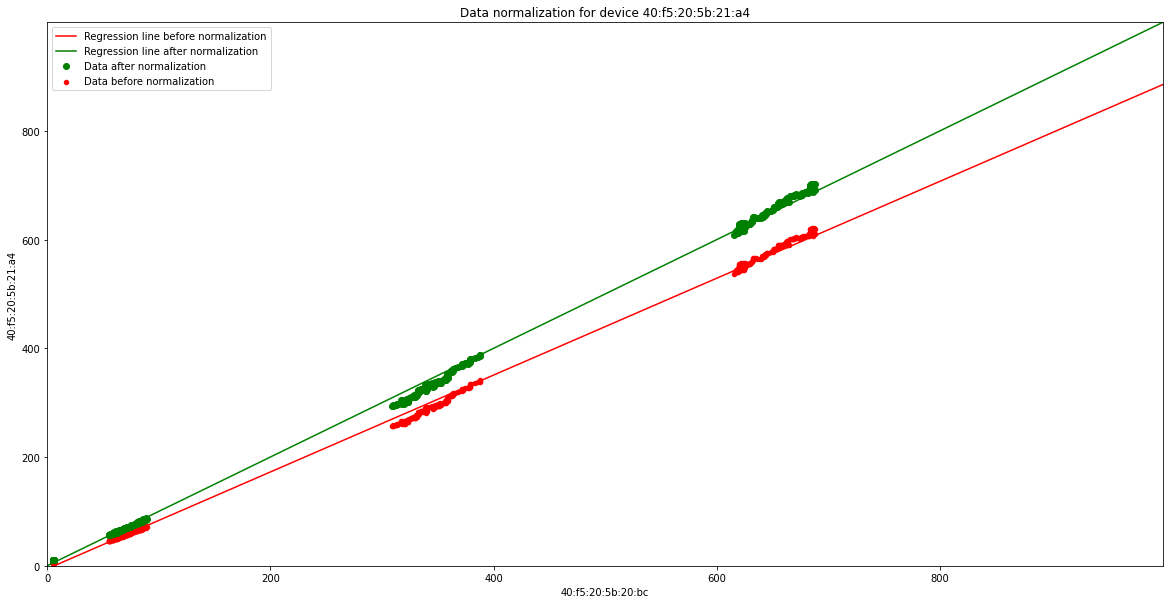

In [47]:
#Change the variable below from 0..19, device number 4 is the reference device
device_index = 15

sensor_range_start = 0
sensor_range_end = 999.9

device = concat_df.columns[device_index]
ax = concat_df.plot.scatter(x=median_device, y= device, figsize=(20,10), color="r", label = "Data before normalization", title = f"Data normalization for device {device}", xlabel="Reference device");
ax.set_ylim(sensor_range_start, sensor_range_end)
ax.set_xlim(sensor_range_start, sensor_range_end)

#Original regression line on device data
slope = coeffs[device][1]
constant = coeffs[device][0]

dummy_median_data = np.linspace(sensor_range_start, sensor_range_end, 100)
ax.plot(dummy_median_data, slope*dummy_median_data + constant, "r", label="Regression line before normalization");

#Ideal correction curve
ax.plot([sensor_range_start, sensor_range_end], [sensor_range_start, sensor_range_end], "g", label="Regression line after normalization");


#Corrected measurements
slope = 1/coeffs[device][1]
constant = -coeffs[device][0]
ax.plot(concat_df[median_device], slope*concat_df[device] + constant, "go", label="Data after normalization");

plt.legend(loc="upper left");

# Correct entire dataset

In [48]:
corrected_baseline_df = masked_baseline_df.copy()
for device in masked_baseline_df.columns:
  slope = 1/coeffs[device][1]
  constant = -coeffs[device][0]
  corrected_baseline_df[device] = slope*masked_baseline_df[device] + constant

In [49]:
corrected_100ug_df = masked_target_100ug_df.copy()
for device in masked_target_800ug_df.columns:
  slope = 1/coeffs[device][1]
  constant = -coeffs[device][0]
  corrected_100ug_df[device] = slope*masked_target_100ug_df[device] + constant

In [50]:
corrected_500ug_df = masked_target_500ug_df.copy()
for device in masked_target_800ug_df.columns:
  slope = 1/coeffs[device][1]
  constant = -coeffs[device][0]
  corrected_500ug_df[device] = slope*masked_target_500ug_df[device] + constant

In [51]:
corrected_800ug_df = masked_target_800ug_df.copy()
for device in masked_target_800ug_df.columns:
  slope = 1/coeffs[device][1]
  constant = -coeffs[device][0]
  corrected_800ug_df[device] = slope*masked_target_800ug_df[device] + constant

# Save correction factors to disk

In [52]:
correction_factors = coeffs.copy()

correction_factors.loc["intercept"] = -coeffs.loc["intercept"]
correction_factors.loc["slope"] = 1/coeffs.loc["slope",:]

In [53]:
results_folder = "results"

if os.path.isdir(results_folder) == False:
  os.mkdir(results_folder)

correction_factors.to_csv(f"{results_folder}/correction_factors.csv", encoding="utf8")

# Plot side by side comparison per measurement phase

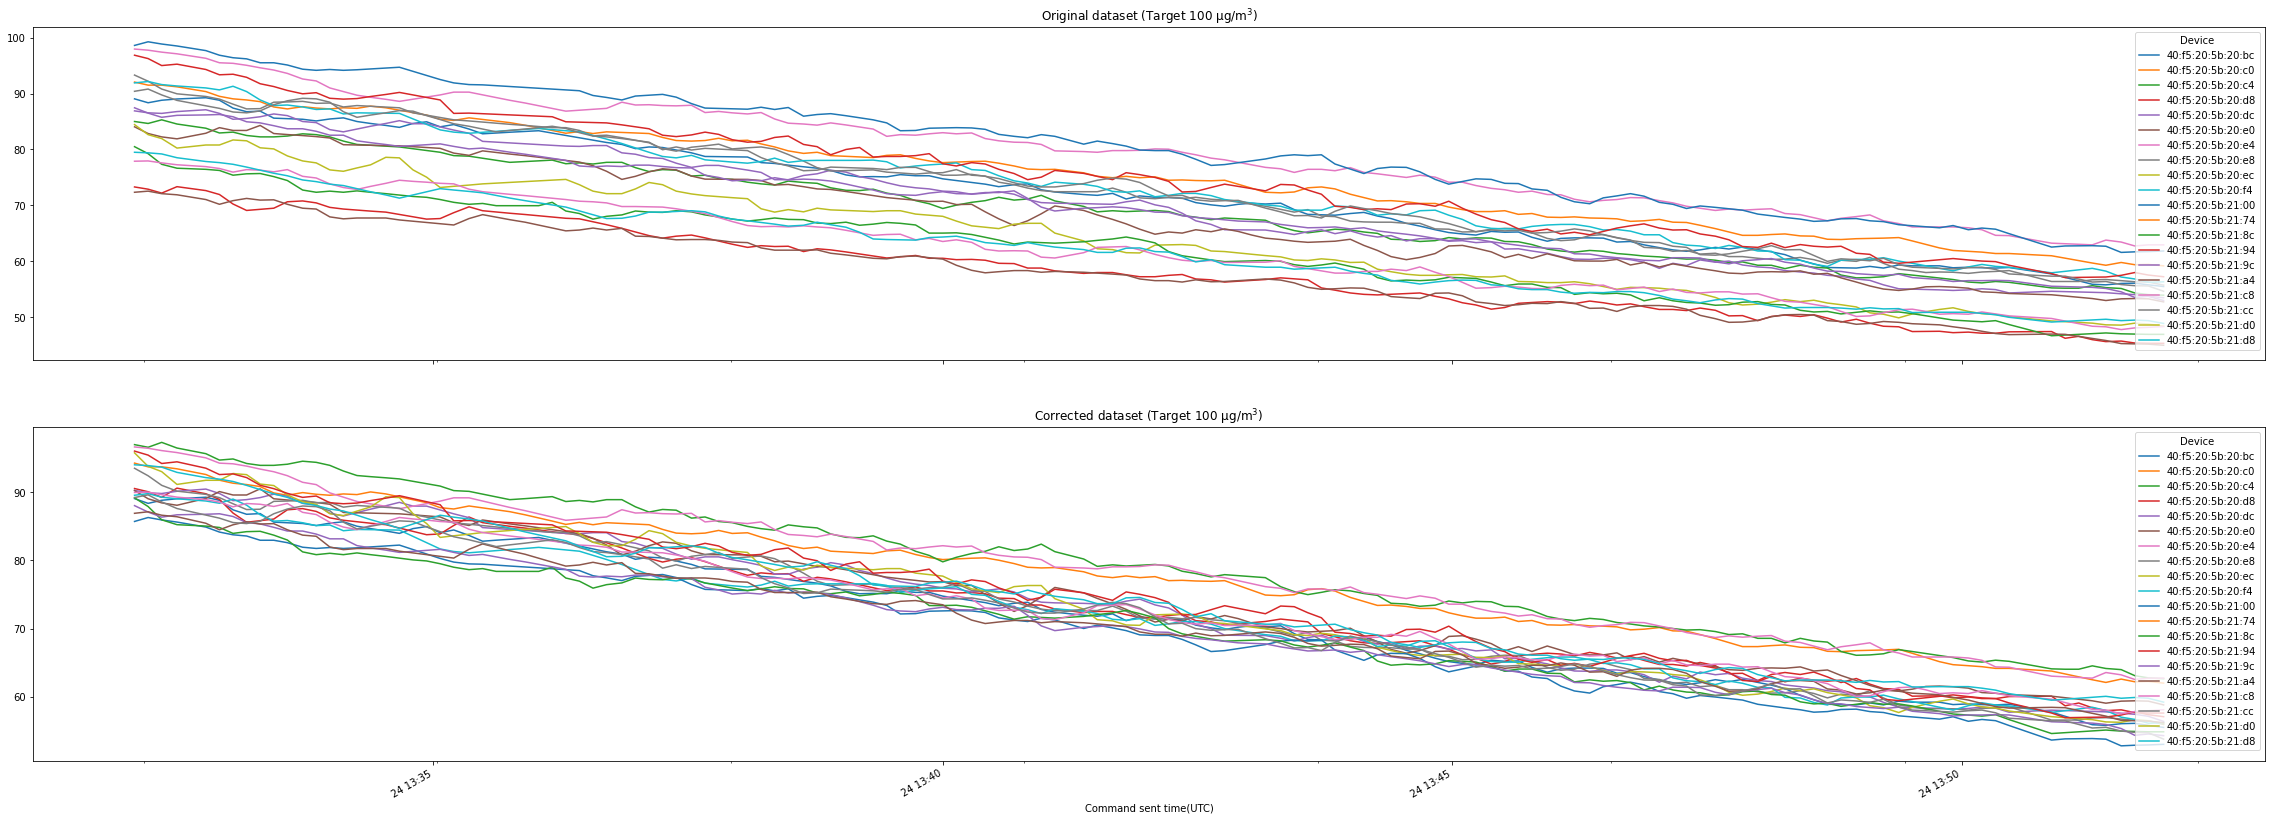

In [54]:
fig, axarr = plt.subplots(2, figsize=(40,15), sharex=True)
masked_target_100ug_df.plot.line(ax=axarr[0], title = "Original dataset (Target 100 $\mathregular{μg/m^{3}}$)")
corrected_100ug_df.plot.line(ax=axarr[1], title = "Corrected dataset (Target 100 $\mathregular{μg/m^{3}}$)");

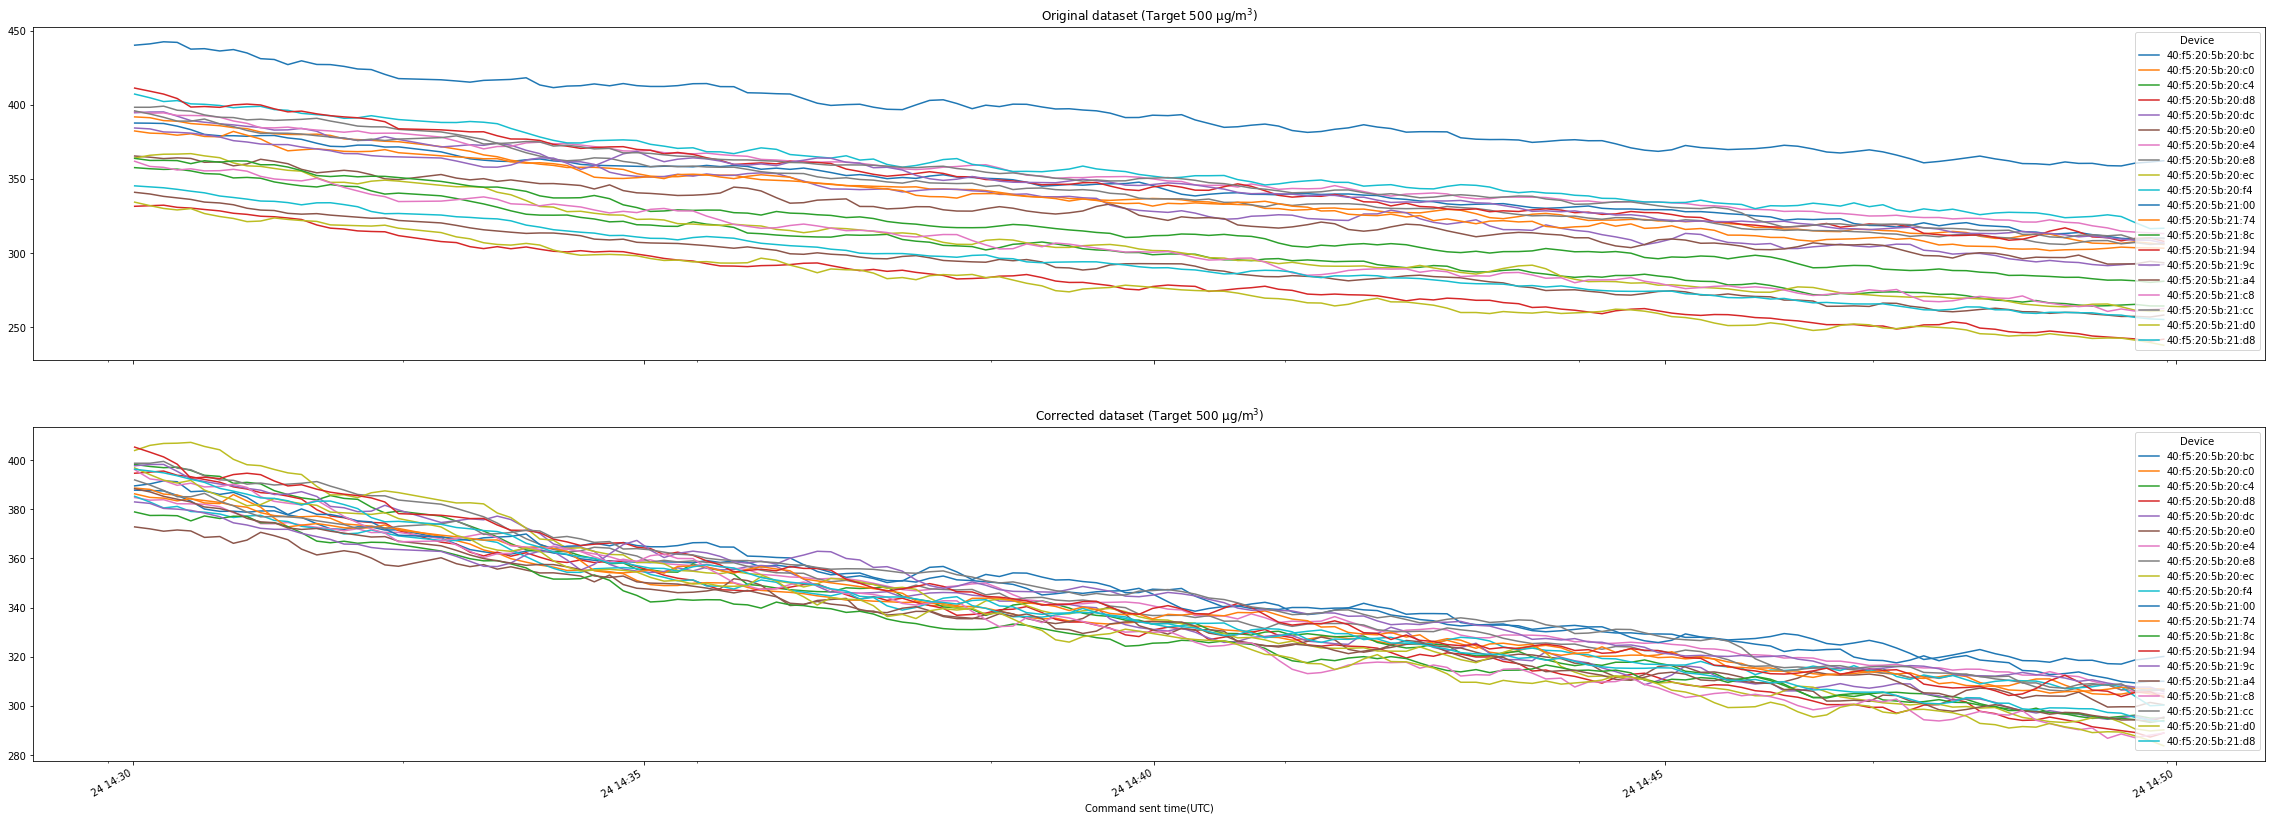

In [55]:
fig, axarr = plt.subplots(2, figsize=(40,15), sharex=True)
masked_target_500ug_df.plot.line(ax=axarr[0], title = "Original dataset (Target 500 $\mathregular{μg/m^{3}}$)");
corrected_500ug_df.plot.line(ax=axarr[1], title = "Corrected dataset (Target 500 $\mathregular{μg/m^{3}}$)");

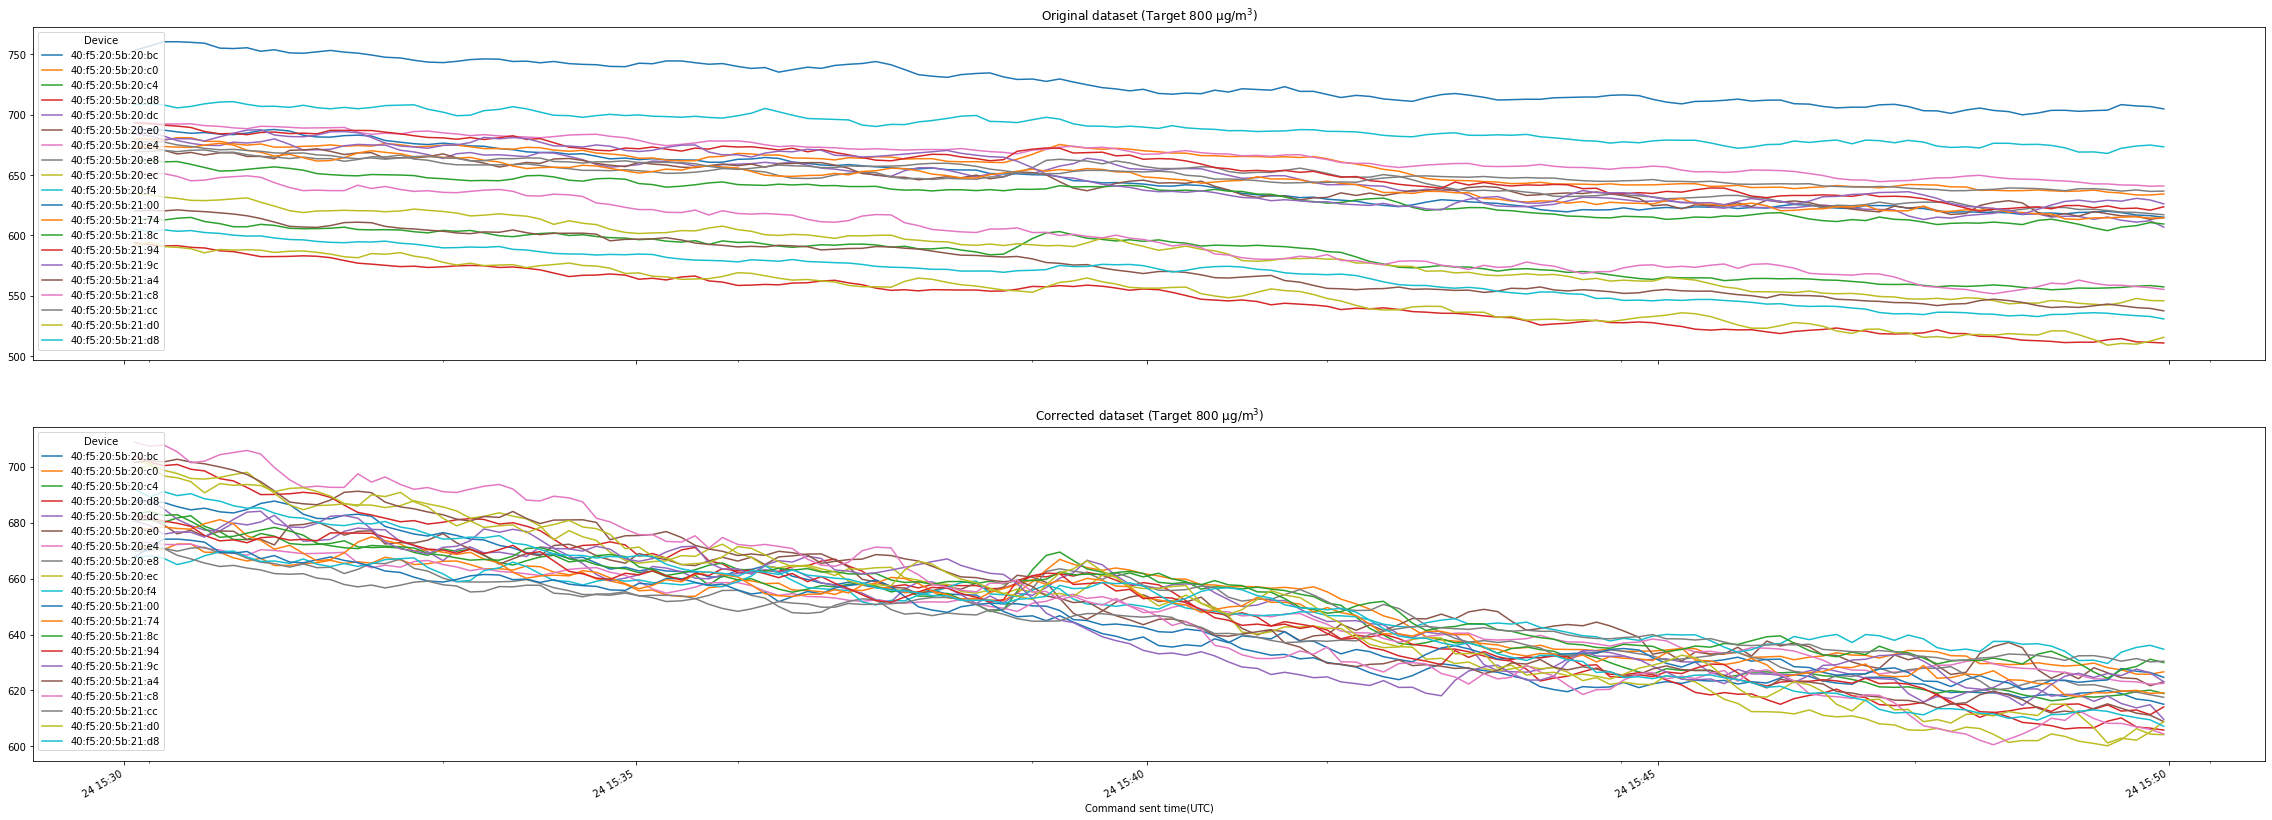

In [56]:
fig, axarr = plt.subplots(2, figsize=(40,15), sharex=True)
masked_target_800ug_df.plot.line(ax=axarr[0], title = "Original dataset (Target 800 $\mathregular{μg/m^{3}}$)");
corrected_800ug_df.plot.line(ax=axarr[1], title = "Corrected dataset (Target 800 $\mathregular{μg/m^{3}}$)");

# Finalize analysis of normalized data

In [57]:
concat_corrected_df = pd.concat([corrected_baseline_df, corrected_100ug_df, corrected_500ug_df, corrected_800ug_df])

In [58]:
concat_corrected_df.head()

Device                  40:f5:20:5b:20:bc  40:f5:20:5b:20:c0  \
Command sent time(UTC)                                         
2021-06-24 12:40:04                  6.10           9.278988   
2021-06-24 12:40:13                  5.90           9.229901   
2021-06-24 12:40:21                  5.70           9.278988   
2021-06-24 12:40:29                  5.75           9.328076   
2021-06-24 12:40:37                  5.60           9.278988   

Device                  40:f5:20:5b:20:c4  40:f5:20:5b:20:d8  \
Command sent time(UTC)                                         
2021-06-24 12:40:04              9.225599          10.562275   
2021-06-24 12:40:13              9.115102          10.267864   
2021-06-24 12:40:21              9.225599          10.385629   
2021-06-24 12:40:29              9.115102          10.208982   
2021-06-24 12:40:37              8.894107          10.208982   

Device                  40:f5:20:5b:20:dc  ...  40:f5:20:5b:21:a4  \
Command sent time(UTC)                     ...                      
2021-06-24 12:40:04              8.988472  ...          11.374134   
2021-06-24 12:40:13              8.888587  ...          11.374134   
2021-06-24 12:40:21              8.838644  ...          11.318028   
2021-06-24 12:40:29              8.838644  ...          11.205817   
2021-06-24 12:40:37              8.988472  ...          11.037499   

Device                  40:f5:20:5b:21:c8  40:f5:20:5b:21:cc  \
Command sent time(UTC)                                         
2021-06-24 12:40:04             11.856674                NaN   
2021-06-24 12:40:13             11.856674           5.434548   
2021-06-24 12:40:21             11.802783           5.335472   
2021-06-24 12:40:29             11.641111           5.285933   
2021-06-24 12:40:37             11.641111           5.484086   

Device                  40:f5:20:5b:21:d0  40:f5:20:5b:21:d8  
Command sent time(UTC)                                        
2021-06-24 12:40:04             11.378535           8.609283  
2021-06-24 12:40:13             11.378535           8.495577  
2021-06-24 12:40:21             11.437032           8.325019  
2021-06-24 12:40:29             11.437032           8.495577  
2021-06-24 12:40:37             11.203044           8.609283  

[5 rows x 20 columns]

# Apply regression between median device and normalized data

In [59]:
y = concat_corrected_df
x = concat_df[median_device]

#Add constant term
x = sm.add_constant(x)

#Create the model and fit, ignore any missing values represented by Nan
model = sm.OLS(endog=y, exog=x, missing='drop')
results = model.fit()

#Print the model parameters
corrected_coeffs = results.params
corrected_coeffs.columns = concat_corrected_df.columns
corrected_coeffs.index = ['intercept', 'slope']
corrected_coeffs

Device     40:f5:20:5b:20:bc  40:f5:20:5b:20:c0  40:f5:20:5b:20:c4  \
intercept                0.0           0.070817          -0.318884   
slope                    1.0           1.000000           1.000000   

Device     40:f5:20:5b:20:d8  40:f5:20:5b:20:dc  ...  40:f5:20:5b:21:a4  \
intercept          -0.746635           0.003946  ...          -0.696973   
slope               1.000000           1.000000  ...           1.000000   

Device     40:f5:20:5b:21:c8  40:f5:20:5b:21:cc  40:f5:20:5b:21:d0  \
intercept          -0.465537          -0.003339          -0.959441   
slope               1.000000           1.000000           1.000000   

Device     40:f5:20:5b:21:d8  
intercept          -0.494259  
slope               1.000000  

[2 rows x 20 columns]